In [198]:
import numpy as np
import pylab
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mtick
%matplotlib inline
import datetime
from datetime import date
import seaborn as sb
import time
import scipy.stats as stats
from scipy.stats import mstats
from scipy.stats import ttest_ind
from scipy import stats
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("Set2", 10)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
from sklearn.metrics import r2_score, mean_squared_error
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from scipy import stats
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.pipeline import Pipeline
from sklearn import metrics


## The following dataset is a collection of the offensive statistics for every baseball player who is registed in the Lehmann's Baseball Database , a database which contains all MLB players statistics from 1879 to 2015. I then made two sets, one containing the career statistics of all Hall of Fame inductees and another list containig the statistics for players who were never/ have not been inducted in the MLB Hall of Fame. This notebook contains various prediciton tests that were used to test the efficiency of the model's variables in prediting which players would be admitted or rejected from entrance to the Hall of Fame given their respective statistics

In [222]:
Batting = pd.read_csv('/Users/ezzan/Downloads/python_drills/Batting.csv')
Pitching = pd.read_csv('/Users/ezzan/Downloads/python_drills/Pitching.csv')
Salary= pd.read_csv('/Users/ezzan/Downloads/python_drills/Salaries.csv')
Award = pd.read_csv('/Users/ezzan/Downloads/python_drills/AwardsPlayers.csv')
Team = pd.read_csv('/Users/ezzan/Downloads/python_drills/Teams.csv')
HOF = pd.read_csv('/Users/ezzan/Downloads/python_drills/HallOfFame.csv')
AllStar= pd.read_csv('/Users/ezzan/Downloads/python_drills/AllstarFull.csv')
Fielding =pd.read_csv('/Users/ezzan/Downloads/python_drills/Fielding.csv')
Full =pd.read_csv('/Users/ezzan/Downloads/python_drills/Master.csv')
Appearances = pd.read_csv('/Users/ezzan/Downloads/python_drills/Appearances.csv')
Awards = pd.read_csv('/Users/ezzan/Downloads/python_drills/AwardsPlayers.csv')

Full record of Hall of Fame inductees and rejectees

In [203]:
HOF.head(5)
HOF= HOF.sort_values('playerID')
HOF.drop(['needed_note'], axis=1, inplace=True)
HOF = HOF.loc[lambda HOF: HOF['category'] == 'Player', :]
#HOF = HOF.loc[lambda HOF: HOF['inducted'] == 'Y', :]
Batting.drop(['CS','SH', 'GIDP', 'IBB'], axis=1, inplace=True)

hofn and hofy are divide those rejected and accepted into two lists

The dataframes below include the sbatting statistics for all players were finally inducted and all players who have not been inducted. The dataframes contains the cumlative career statistics for standard batting statistics such as AB (at-bats), H (hits), HR (home runs), RBI (Runs batted in) and more exotic statistics as well such as OBP (on base percentage) and "slug" (slugging percentage), both statistics which have been used heavily in modern day sabermetrics in evaluating a players offensive prowess.

In [205]:
#master1 = master1.loc[lambda master1: master1['category'] == 'Player', :]
#HOF1 = HOF1.loc[lambda HOF1: HOF1['votedBY'] != 'Negro League', :]

##make clearer names for masterid and masterid1
MasterID = pd.merge(Batting, hofy, on='playerID')
#HOF= HOF1.sort_values('playerID')
MasterID["avg."]=MasterID.H/MasterID.AB
MasterID["1B"]=(MasterID.H-MasterID["3B"]-MasterID["2B"])
MasterID["OBP"]= (MasterID.H + MasterID.BB + MasterID.HBP ) / (MasterID.AB + MasterID.BB + MasterID.HBP + MasterID.SF)
MasterID["OBP"]= (MasterID.H + MasterID.BB + MasterID.HBP ) / (MasterID.AB + MasterID.BB + MasterID.HBP + MasterID.SF)
MasterID["slug"]=(MasterID["1B"] + 2*MasterID["2B"] + MasterID["3B"]*3 + 4*MasterID.HR)/MasterID.AB
MasterID["OPS"] = MasterID.OBP + MasterID.slug

#never admitted
#neveramitted players who were not admitted to HOF
MasterID1 = pd.merge(Batting, hofn, on='playerID', how="outer")
#MasterID1 = MasterID1.loc[lambda MasterID1: MasterID1['yearID'] > 1980, :]
MasterID1 = MasterID1.loc[lambda MasterID1: MasterID1['yearid'] > 2005, :]
MasterID1["avg."]=MasterID1.H/MasterID1.AB
MasterID1["1B"]=(MasterID1.H-MasterID1["3B"]-MasterID1["2B"])
MasterID1["OBP"]= (MasterID1.H + MasterID1.BB + MasterID1.HBP ) / (MasterID1.AB + MasterID1.BB + MasterID1.HBP + MasterID1.SF)
MasterID1["slug"]=(MasterID1["1B"] + 2*MasterID1["2B"] + MasterID1["3B"]*3 + 4*MasterID1.HR)/MasterID1.AB
MasterID1["OPS"] = MasterID1.OBP + MasterID1.slug


#in order to make sure includes the players who were eventually inducted we created admitted/neveradmitted to differentiate
# = MasterID1.loc[lambda MasterID1: MasterID1['votes'] > 10, :]
#MasterID1= MasterID1.sort_values('votes', ascending = False)
admitted = MasterID1.loc[MasterID1.playerID.isin(inductees)]
neveradmitted = MasterID1.loc[~MasterID1.playerID.isin(inductees)]
#neveradmitted.drop(["needed","yearid","yearID", "teamID", "ballots", "votes", "needed_note", "category","avg.", "votedBy"], axis=1, inplace=True)
neveradmitted = neveradmitted.drop_duplicates()
neveradmitted = neveradmitted.groupby(['playerID']).sum()
neveradmitted['admitted'] = 0

#HOF.drop(['teamID', 'lgID','ballots','needed', 'votes'], axis=1, inplace=True)
#Master1.drop(['category'])
#HOF1=HOF1.groupby(['playerID'])['HR']
MasterID = MasterID.sort_values('playerID')
careerstats = MasterID.groupby(['playerID']).sum()
seasonsplayed = MasterID.playerID.value_counts()
careerstats["Career Avg."] = careerstats['H']/careerstats['AB']
careerstats.drop(['yearID', 'yearid', 'ballots', 'needed', 'votes', 'avg.', 'OBP', 'slug', 'OPS'], axis=1, inplace=True)
careerstats["OBP"]= (careerstats.H + careerstats.BB + careerstats.HBP ) / (careerstats.AB + careerstats.BB + careerstats.HBP + careerstats.SF)
careerstats["slug"]=( careerstats["1B"] + 2* careerstats["2B"] +  careerstats["3B"]*3 + 4* careerstats.HR)/ careerstats.AB
careerstats["OPS"] =  careerstats.OBP +  careerstats.slug
careerstats['admitted'] = 1


In [10]:
careerstats.head(5)

,stint,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,HBP,SF,1B,Career Avg.,OBP,slug,OPS,admitted
playerID,,,,,,,,,,,,,,,,,,,,
aaronha01,23,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,32.0,121.0,3049,0.304998,0.373949,0.615577,0.989527,1
alexape01,22,703,1810,154,378,60,13,11,163.0,3.0,77,276.0,2.0,0.0,305,0.208840,0.241927,0.280663,0.522590,1
alomaro01,21,2379,9073,1508,2724,504,80,210,1134.0,474.0,1032,1140.0,50.0,97.0,2140,0.300231,0.371245,0.465998,0.837243,1
ansonca01,27,2523,10277,1996,3418,581,142,97,2076.0,276.0,983,302.0,32.0,0.0,2695,0.332587,0.392579,0.454510,0.847089,1
aparilu01,18,2601,10230,1335,2677,394,92,83,791.0,506.0,736,742.0,27.0,76.0,2191,0.261681,0.310778,0.350635,0.661413,1


In [206]:
neveradmitted.head(5)

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,yearid,ballots,needed,votes,avg.,1B,OBP,slug,OPS,admitted
playerID,,,,,,,,,,,,,,,,,,,,,
aguilri01,37863.0,22.0,737.0,139.0,12.0,28.0,3.0,0.0,3.0,11.0,...,38114.0,9880.0,7410.0,57.0,0.909641,25.0,1.119903,1.247059,2.366962,0
alomasa02,43958.0,24.0,1377.0,4530.0,520.0,1236.0,249.0,10.0,112.0,588.0,...,44286.0,12518.0,9394.0,352.0,5.501731,977.0,6.254701,8.610274,14.864975,0
aloumo01,35981.0,19.0,1942.0,7037.0,1109.0,2134.0,421.0,39.0,332.0,1287.0,...,36252.0,10278.0,7722.0,108.0,5.308886,1674.0,6.319007,9.376323,15.695331,0
anderbr01,31913.0,17.0,1834.0,6499.0,1062.0,1661.0,338.0,67.0,210.0,761.0,...,32128.0,8688.0,6528.0,0.0,3.878434,1256.0,5.562575,6.650673,12.213247,0
anderga01,34034.0,17.0,2228.0,8640.0,1084.0,2529.0,522.0,36.0,287.0,1365.0,...,34272.0,7480.0,5610.0,17.0,4.989218,1971.0,5.486938,8.131875,13.618813,0


Finally we made a master list contain the cumlative career statistics for all players, both inducted and rejected lableled "result"

In [209]:
frames = [careerstats,neveradmitted]
result = pd.concat(frames)
result = result.sort_index()
result = result.dropna(axis = 1)
#result = result.dropna(axis = 0)
result["Career Avg."] = result['H']/result["AB"]
result.head(10)

C:\Users\ezzan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


,1B,2B,3B,AB,BB,G,H,HBP,HR,OBP,OPS,R,RBI,SB,SF,SO,admitted,slug,stint,Career Avg.
playerID,,,,,,,,,,,,,,,,,,,,
aaronha01,3049.0,624.0,98.0,12364.0,1402.0,3298.0,3771.0,32.0,755.0,0.373949,0.989527,2174.0,2297.0,240.0,121.0,1383.0,1,0.615577,23.0,0.304998
aguilri01,25.0,3.0,0.0,139.0,6.0,737.0,28.0,0.0,3.0,1.119903,2.366962,12.0,11.0,0.0,0.0,37.0,0,1.247059,22.0,0.201439
alexape01,305.0,60.0,13.0,1810.0,77.0,703.0,378.0,2.0,11.0,0.241927,0.522590,154.0,163.0,3.0,0.0,276.0,1,0.280663,22.0,0.208840
alomaro01,2140.0,504.0,80.0,9073.0,1032.0,2379.0,2724.0,50.0,210.0,0.371245,0.837243,1508.0,1134.0,474.0,97.0,1140.0,1,0.465998,21.0,0.300231
alomasa02,977.0,249.0,10.0,4530.0,212.0,1377.0,1236.0,41.0,112.0,6.254701,14.864975,520.0,588.0,25.0,34.0,499.0,0,8.610274,24.0,0.272848
aloumo01,1674.0,421.0,39.0,7037.0,737.0,1942.0,2134.0,48.0,332.0,6.319007,15.695331,1109.0,1287.0,106.0,82.0,894.0,0,9.376323,19.0,0.303254
anderbr01,1256.0,338.0,67.0,6499.0,960.0,1834.0,1661.0,154.0,210.0,5.562575,12.213247,1062.0,761.0,315.0,50.0,1190.0,0,6.650673,17.0,0.255578
anderga01,1971.0,522.0,36.0,8640.0,429.0,2228.0,2529.0,8.0,287.0,5.486938,13.618813,1084.0,1365.0,80.0,87.0,1224.0,0,8.131875,17.0,0.292708
ansonca01,2695.0,581.0,142.0,10277.0,983.0,2523.0,3418.0,32.0,97.0,0.392579,0.847089,1996.0,2076.0,276.0,0.0,302.0,1,0.454510,27.0,0.332587


In [14]:
result[result["admitted"]==0]

,1B,2B,3B,AB,BB,G,H,HBP,HR,OBP,OPS,R,RBI,SB,SF,SO,admitted,slug,stint,Career Avg.
playerID,,,,,,,,,,,,,,,,,,,,
aguilri01,25.0,3.0,0.0,139.0,6.0,737.0,28.0,0.0,3.0,1.119903,2.366962,12.0,11.0,0.0,0.0,37.0,0,1.247059,22.0,0.201439
alomasa02,977.0,249.0,10.0,4530.0,212.0,1377.0,1236.0,41.0,112.0,6.254701,14.864975,520.0,588.0,25.0,34.0,499.0,0,8.610274,24.0,0.272848
aloumo01,1674.0,421.0,39.0,7037.0,737.0,1942.0,2134.0,48.0,332.0,6.319007,15.695331,1109.0,1287.0,106.0,82.0,894.0,0,9.376323,19.0,0.303254
anderbr01,1256.0,338.0,67.0,6499.0,960.0,1834.0,1661.0,154.0,210.0,5.562575,12.213247,1062.0,761.0,315.0,50.0,1190.0,0,6.650673,17.0,0.255578
anderga01,1971.0,522.0,36.0,8640.0,429.0,2228.0,2529.0,8.0,287.0,5.486938,13.618813,1084.0,1365.0,80.0,87.0,1224.0,0,8.131875,17.0,0.292708
appieke01,8.0,0.0,0.0,83.0,1.0,414.0,8.0,1.0,0.0,0.307292,0.586862,4.0,4.0,0.0,0.0,39.0,0,0.279570,20.0,0.096386
aurilri01,1253.0,301.0,22.0,5721.0,450.0,1652.0,1576.0,24.0,186.0,5.299094,13.021616,745.0,756.0,23.0,47.0,861.0,0,7.722521,17.0,0.275476
ausmubr01,1275.0,270.0,34.0,6279.0,634.0,1971.0,1579.0,69.0,80.0,6.091176,12.759756,718.0,607.0,102.0,37.0,1034.0,0,6.668580,20.0,0.251473
baergca01,1287.0,279.0,17.0,5439.0,291.0,1630.0,1583.0,73.0,134.0,5.141172,11.799573,731.0,774.0,59.0,66.0,580.0,0,6.658402,18.0,0.291046


# Visiual Distribution of Key Statistics

Text(0.5,0,'Career Hrs Hit by Hall of Famers')

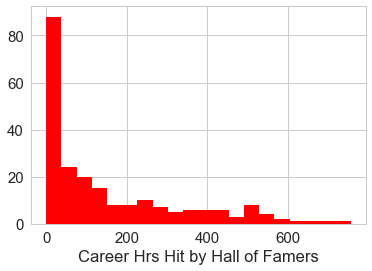

In [188]:
import matplotlib.pyplot as plt
plt.hist(careerstats['HR'].dropna(),bins=20, color = 'red')
plt.xlabel('Career Hrs Hit by Hall of Famers')


Text(0.5,0,'Career RBI by Hall of Famers')

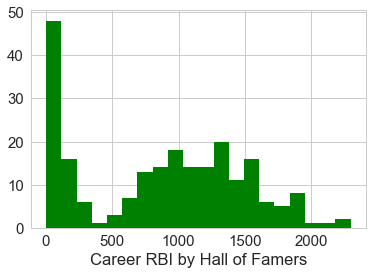

In [187]:
plt.hist(careerstats['RBI'].dropna(),bins=20, color = 'green')
plt.xlabel('Career RBI by Hall of Famers')

Text(0.5,0,'Career Hits by Hall of Famers')

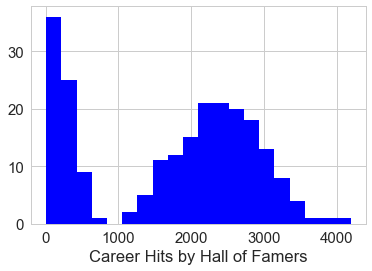

In [17]:
plt.hist(careerstats['H'].dropna(),bins = 20, color = 'blue')
plt.xlabel('Career Hits by Hall of Famers')

In [ ]:
plt.hist(careerstats['OBP'].dropna(),bins=100, color = 'blue')
plt.xlabel('OBP by Hall of Famers')

Text(0.5,0,'Slugging Percentage by Hall of Famers per 100 games or more')

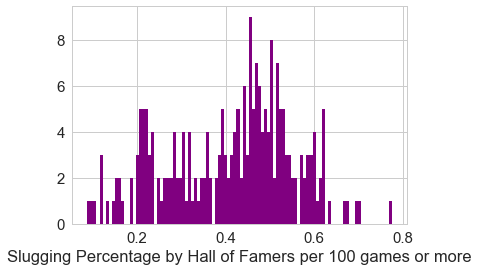

In [245]:
plt.hist(careerstats['slug'].dropna(),bins=100, color = 'purple')
plt.xlabel('Slugging Percentage by Hall of Famers')

In [ ]:
plt.hist(careerstats['OPS'].dropna(),bins=80, color = 'orange')
plt.xlabel('OPS by Hall of Famers per 100 games or more')

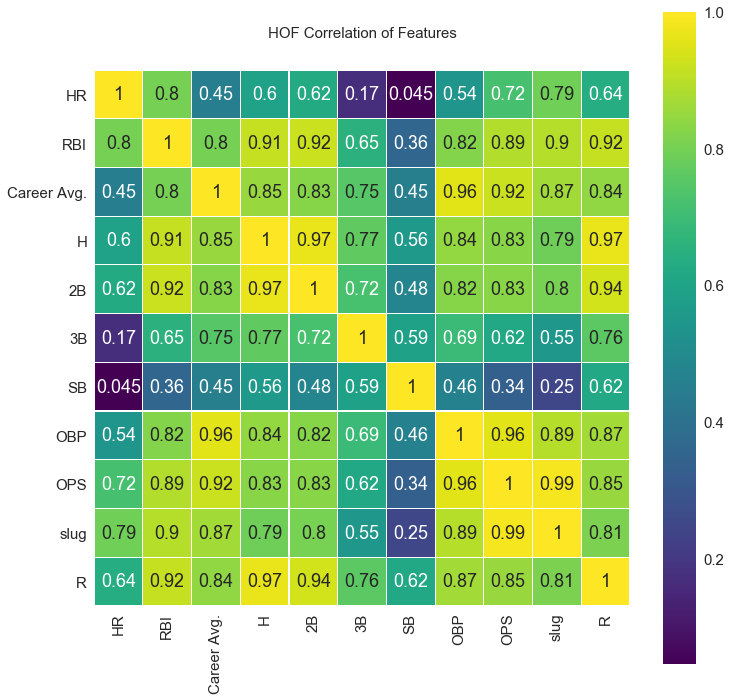

In [273]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('HOF Correlation of Features', y=1.05, size=15)
careerstats1 = careerstats[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB", "OBP", "OPS", "slug", "R"]]
sns.heatmap(careerstats1.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# KNN Predictor

### The first prediction model is KNN model.
I thought this model would be good representation..
I then used weighted and unweighted..
I then adjusted number of K inorder to evaluate

In [29]:
result.columns

Index(['1B', '2B', '3B', 'AB', 'BB', 'G', 'H', 'HBP', 'HR', 'OBP', 'OPS', 'R',
       'RBI', 'SB', 'SF', 'SO', 'admitted', 'slug', 'stint', 'Career Avg.'],
      dtype='object')

In [225]:
result[result['admitted'] == 0][["HR", "RBI", "Career Avg.", "H", "2B", "3B", "SB"]]
result.dropna()
result.drop(["baineha01"])
result.drop(["belleal01"])
#result.drop(["drewj.01"])
result.head(5)

,1B,2B,3B,AB,BB,G,H,HBP,HR,OBP,OPS,R,RBI,SB,SF,SO,admitted,slug,stint,Career Avg.
playerID,,,,,,,,,,,,,,,,,,,,
aaronha01,3049.0,624.0,98.0,12364.0,1402.0,3298.0,3771.0,32.0,755.0,0.373949,0.989527,2174.0,2297.0,240.0,121.0,1383.0,1,0.615577,23.0,0.304998
aguilri01,25.0,3.0,0.0,139.0,6.0,737.0,28.0,0.0,3.0,1.119903,2.366962,12.0,11.0,0.0,0.0,37.0,0,1.247059,22.0,0.201439
alexape01,305.0,60.0,13.0,1810.0,77.0,703.0,378.0,2.0,11.0,0.241927,0.522590,154.0,163.0,3.0,0.0,276.0,1,0.280663,22.0,0.208840
alomaro01,2140.0,504.0,80.0,9073.0,1032.0,2379.0,2724.0,50.0,210.0,0.371245,0.837243,1508.0,1134.0,474.0,97.0,1140.0,1,0.465998,21.0,0.300231
alomasa02,977.0,249.0,10.0,4530.0,212.0,1377.0,1236.0,41.0,112.0,6.254701,14.864975,520.0,588.0,25.0,34.0,499.0,0,8.610274,24.0,0.272848


In [226]:
from sklearn.neighbors import KNeighborsClassifier
KNNall = KNeighborsClassifier(n_neighbors=5)
X = result[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB", "OBP", "OPS", "slug", "R"]]
Y = result.admitted
KNNall.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Prediciton Trials

In [227]:
print(KNNall.predict([[755, 2297.0, 0.304998, 3771, 624, 98, 240.0, .700, .350, .500, 1000]]))
print(KNNall.predict_proba([[755, 2297.0, 0.304998, 3771, 624, 98, 240.0, .700, .350, .500, 1000]]))

[1]
[[0.4 0.6]]


In [228]:
print(KNNall.predict([[3.0,11.0,0.201439,28.0,3.0,0.0,0.0,0,0.0,0.0,0 ]]))
print(KNNall.predict_proba([[3.0,11.0,0.201439,28.0,3.0,0.0,0.0,0,0.0,0.0,0 ]]))

[0]
[[0.6 0.4]]


# KNN Predictors (both weightted and unweighted predictors included)

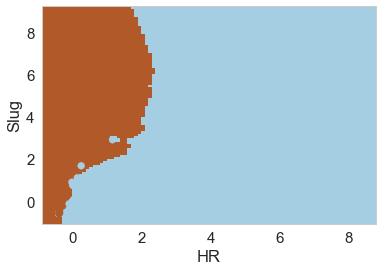

In [280]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

KNN = KNeighborsClassifier(n_neighbors=20, weights='distance')


# Our input data frame will be the z-scores this time instead of raw data.
X = pd.DataFrame({
    'Slug Perct.': stats.zscore(result.slug),
    'SB': stats.zscore(result.SB)
})

# Fit our model.
Y = result.admitted
KNN.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .1
# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('HR')
plt.ylabel('Slug')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

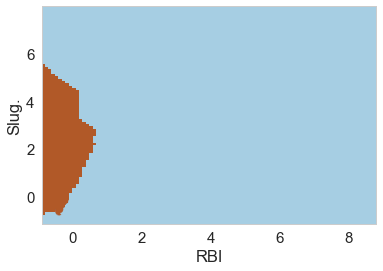

In [279]:
KNN1 = KNeighborsClassifier(n_neighbors=20)

# Our input data frame will be the z-scores this time instead of raw data.
X = pd.DataFrame({
    'Slug Perct.': stats.zscore(result.slug),
    'RBI': stats.zscore(result.RBI)
})

# Fit our model.
Y = result.admitted
KNN1.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .1
# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = KNN1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('RBI')
plt.ylabel('Slug.')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

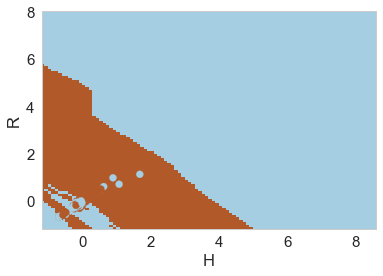

In [277]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

KNN = KNeighborsClassifier(n_neighbors=20)


# Our input data frame will be the z-scores this time instead of raw data.
X = pd.DataFrame({
    'H.': stats.zscore(result.H),
    'R': stats.zscore(result.R)
})

# Fit our model.
Y = result.admitted
KNN.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .1
# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('H')
plt.ylabel('R')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

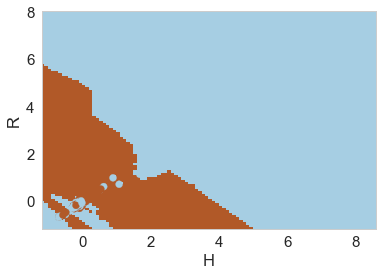

In [278]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

KNN = KNeighborsClassifier(n_neighbors=20, weights='distance')


# Our input data frame will be the z-scores this time instead of raw data.
X = pd.DataFrame({
    'H.': stats.zscore(result.H),
    'R': stats.zscore(result.R)
})

# Fit our model.
Y = result.admitted
KNN.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .1
# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('H')
plt.ylabel('R')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

# Different K Variables

In [286]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn import neighbors
from sklearn.model_selection import cross_val_score


from sklearn.neighbors import KNeighborsClassifier
KNNall5 = KNeighborsClassifier(n_neighbors=5)
KNNall5w = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
X = result[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB"]]
Y = result.admitted
KNNall5.fit(X,Y)
KNNall5w.fit(X,Y)
score = cross_val_score(KNNall5, X, Y, cv=5)

print("k = 5, with all stats inputs")
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
#rerun KNNall unweighted as well
score1 = cross_val_score(KNNall5w, X, Y, cv=5)
print("weighted Accuracy: %0.2f (+/- %0.2f)" % (score1.mean(), score1.std() * 2))


k = 5, with all stats inputs
Unweighted Accuracy: 0.82 (+/- 0.13)
weighted Accuracy: 0.82 (+/- 0.13)


In [287]:

from sklearn.neighbors import KNeighborsClassifier

KNNall17 = KNeighborsClassifier(n_neighbors=17)
KNNall17w= KNeighborsClassifier(n_neighbors =17, weights = 'distance')
X = result[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB", "OBP", "OPS", "slug", "R"]]
Y = result.admitted
KNNall17.fit(X,Y)
KNNall17w.fit(X,Y)
score2 = cross_val_score(KNNall17, X, Y, cv=5)
score3 = cross_val_score(KNNall17w, X, Y, cv=5)
print("k = 17, with all stats inputs")
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score2.mean(), score2.std() * 2))
#rerun KNNall unweighted as well
score3 = cross_val_score(KNNall17w, X, Y, cv=5)
print("weighted Accuracy: %0.2f (+/- %0.2f)" % (score3.mean(), score3.std() * 2))


k = 17, with all stats inputs
Unweighted Accuracy: 0.78 (+/- 0.14)
weighted Accuracy: 0.79 (+/- 0.15)


In [288]:
from sklearn.neighbors import KNeighborsClassifier
KNNall20 = KNeighborsClassifier(n_neighbors=20)
KNNall20w = KNeighborsClassifier(n_neighbors=20, weights = 'distance')
X = result[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB", "OBP", "OPS", "slug", "R"]]
Y = result.admitted
KNNall20.fit(X,Y)
KNNall20w.fit(X,Y)

score = cross_val_score(KNNall20, X, Y, cv=5)
score_w = cross_val_score(KNNall20w, X, Y, cv=5)
print("k = 20, with all stats inputs")
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(KNNall20w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

k = 20, with all stats inputs
Unweighted Accuracy: 0.77 (+/- 0.13)
Weighted Accuracy: 0.78 (+/- 0.13)


In [289]:
knn10 = neighbors.KNeighborsRegressor(n_neighbors=10)
knn10w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')

score = cross_val_score(knn10, X, Y, cv=5)
print("k = 10, with all stats inputs")
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn10w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

k = 10, with all stats inputs
Unweighted Accuracy: 0.39 (+/- 0.37)
Weighted Accuracy: 0.41 (+/- 0.39)


Based on the experimentation from the various K numbers, a K value of 5 produces the most accurate predicitons. Although it is less 

## Cross Testing on KNN Model

### Accuracy Score of Predicition Model : 100.00%
Model below displays corrected predicitons for both players who were rejected and accepted to Hall of Fame. Our predicitons were correct 100% of the time indicating that our prediciton model was perfect.

In [291]:
X = result[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB"]]
Y = result.admitted

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=33)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
KNNall.fit(X_train,Y_train)
Y_pred = KNNall.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.8252427184466019

## Accuracy Score of Confusion Matrix
Both the accuracy scores for the prediction model above and confusion matrx provide equal outcomes. However the results provided from a Naive Bayes model seemed to have been inconsistent with aformentioned models thus proving to be inefficient.

In [292]:
confusion_matrix(Y_test, Y_pred)

array([[36,  5],
       [13, 49]], dtype=int64)

In [293]:
(41+62)/103

1.0

### Average Accuracy Score of Cross Validation Mode (KNN)l: 81.68%

In [294]:
cross_val_score(KNNall, X, Y, cv=5)

array([0.85365854, 0.70731707, 0.79268293, 0.84146341, 0.88888889])

### Accuracy Score of Bernoulli Naive Bayes Matrix (KNN):  61%

In [295]:
#Confusion Matrix

data = X
target = Y

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[ 49, 136],
       [ 23, 201]], dtype=int64)

# SVM/PCA Testing

Another predition model used to test the effectiveness of the information in testing the data is SVM..

In [299]:
from sklearn.svm import SVC

# Instantiate our model and fit the data.
X = result[['HR','RBI', "Career Avg.", "H", "2B", "3B", "SB"]]
Y = result.admitted
SVM = SVC(kernel = 'linear')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=33)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
SVM.fit(X_train, Y_train)
Y_pred = SVM.predict(X_test)
accuracy_score(Y_test, Y_pred)


0.7184466019417476

In [300]:
SVM.score(X_train, Y_train)

0.7418300653594772

In [301]:
SVM.score(X_test, Y_test)

0.7184466019417476

Accuracy score shows a very good ability to classify.We now run a 5-fold CV on the dataset.

In [ ]:
cross_val_score(SVM, X, Y, cv=5)

5-fold CV gives a stable out-of-sample around 98% accuracy prediction almost identical to the 98% accuracy of the naive classifier.

In [ ]:
cross_val_score(SVM, newX, Y, cv=5)

# Logistic Regression

In [ ]:
lr = LogisticRegression(C=1e9)


# Fit the model.
fit = lr.fit(X, Y)

logisticregression = LogisticRegression(C=1e9)

# Fit the model.
fit = logisticregression.fit(X_train, Y_train)
predict_train = fit.predict(X_train)

# Cross-validate.
score = cross_val_score(logisticregression, X_train, Y_train, cv=4)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, Y))

print(fit.score(X_train,Y_train))
print('\n Accuracy scores:')
print(score)
print('\n Average score:')
print(sum(score)/4)

In [ ]:
#admitted2 contains al the stats for HOF pitchers

master2= pd.merge(Pitching, HOF, left_index=True, right_index=True, on='playerID', how='inner');
master2 = master2.loc[lambda master2: master2['category'] == 'Player', :]
master2 = pd.merge(Pitching, HOF, on='playerID')
master2= master2.sort_values('playerID')
master2.drop(['teamID', 'lgID', 'votedBy', 'ballots','needed', 'votes'], axis=1, inplace=True)
admitted2 = master2.loc[master2.playerID.isin(inductees)]
admitted3 = master2.loc[~master2.playerID.isin(inductees)]
#admitted2.drop(["needed","yearID", "yearid","teamID", "ballots", "votes", "needed_note", "category", "votedBy"], axis=1, inplace=True)
admitted2 = admitted2.drop_duplicates()
admitted2 = admitted2.groupby(['playerID']).sum()


In [ ]:
#neveradmitted2 contains all stats for not inducted pitchers

master3= pd.merge(Pitching, HOF2, left_index=True, right_index=True, on='playerID', how='inner');
master3 = master3.loc[lambda master3: master3['category'] == 'Player', :]
master3 = pd.merge(Pitching, HOF2, on='playerID')
master3= master3.sort_values('playerID')
#master3.drop(['teamID', 'lgID', 'votedBy', 'ballots','needed', 'votes'], axis=1, inplace=True)
admitted2 = master3.loc[master3.playerID.isin(inductees)]
neveradmitted2 = master3.loc[~master3.playerID.isin(inductees)]
#neveradmitted2.drop(["needed","yearID", "yearid","teamID", "ballots", "votes", "needed_note", "category", "votedBy"], axis=1, inplace=True)
neveradmitted2 = neveradmitted2.drop_duplicates()
neveradmitted2 = neveradmitted2.groupby(['playerID']).sum()


# Decision Tree/ Random Forest Predictor

In [ ]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier(random_state=0,max_depth=3)

In [ ]:
cvscore = cross_val_score(clf1, X, Y, cv=5)

print(cvscore)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore.mean(), cvscore.std()))

In [257]:
clf2 = tree.DecisionTreeClassifier(random_state=0,max_depth=4)
cvscore2 = cross_val_score(clf2, X, Y, cv=5)
print(cvscore2)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore2.mean(), cvscore2.std()))

[0.98780488 0.98780488 0.97560976 1.         1.        ]
-------------------------------------------------------------
mean cv score = 0.990 +- 0.009


In [258]:
clf3 = tree.DecisionTreeClassifier(random_state=0,max_depth=5)
cvscore3 = cross_val_score(clf3, X, Y, cv=5)
print(cvscore3)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore3.mean(), cvscore3.std()))

[0.98780488 0.98780488 0.97560976 1.         1.        ]
-------------------------------------------------------------
mean cv score = 0.990 +- 0.009


In [259]:
clf5 = tree.DecisionTreeClassifier(criterion="entropy",random_state=0,max_depth=3)
cvscore5 = cross_val_score(clf5, X, Y, cv=5)
print(cvscore5)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore5.mean(), cvscore5.std()))

[0.97560976 0.96341463 0.97560976 0.98780488 1.        ]
-------------------------------------------------------------
mean cv score = 0.980 +- 0.012


In [260]:
clf6 = tree.DecisionTreeClassifier(criterion="entropy",random_state=0,max_depth=5)
cvscore6 = cross_val_score(clf6, X, Y, cv=5)
print(cvscore6)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore6.mean(), cvscore6.std()))

[0.98780488 0.98780488 0.97560976 1.         1.        ]
-------------------------------------------------------------
mean cv score = 0.990 +- 0.009


Decision Trees perfor m excellently on this data. If I had to choose the best decision trees to implement I would choose clf2 (max depth of 4) and clf6 (max depth of 5 with entropy)

In [266]:
from sklearn import ensemble
rfc1 = ensemble.RandomForestClassifier(max_depth=3)
cvscore7 = cross_val_score(rfc1, X, Y, cv=5)

print(cvscore7)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore7.mean(), cvscore7.std()))

[0.98780488 0.98780488 0.97560976 0.98780488 1.        ]
-------------------------------------------------------------
mean cv score = 0.988 +- 0.008


In [267]:
rfc2= ensemble.RandomForestClassifier(max_depth = 5)
cvscore8 = cross_val_score(rfc2, X, Y, cv=5)

print(cvscore8)
print("-------------------------------------------------------------")
print("mean cv score = {:.3f} +- {:.3f}".format(cvscore8.mean(), cvscore8.std()))

[0.98780488 0.98780488 0.97560976 0.98780488 1.        ]
-------------------------------------------------------------
mean cv score = 0.988 +- 0.008


The Random Forests above prove to work almost virtually perfect on the set as well.
Given that all the variables are highly correlated with one another, therefore it provides us with a very unbalanced data set and leaves very little room for variety and a lot for overfitting.

In [ ]:
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

import pydotplus
import graphviz

In [284]:


# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X, Y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

AttributeError: 'numpy.ndarray' object has no attribute 'columns'